# PMT GEM Istogramma di Carica di Singolo Fotoelettrone

In [13]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt

In [14]:
fileROOT = root.TFile('../SinglePhoto/singlePhoto5mV.root')#"chargeDataBlu.root") #nome del rootfile
tree = fileROOT.Get("t1") #nome del datatree

nDat = 1024*4 #numero dati per evento
nEvts = tree.GetEntries() #numero di eventi
n = 1024
#creo due array vuoti per salvare wave_array e time_array del .root

wave = np.zeros((nEvts,nDat))
time = np.zeros((nEvts,nDat))

#eseguo un ciclo sul tree e salvo i dati dentro gli array come ulteriori array...
#quindi adesso avrò array 2d in cui il primo indice si riferisce all'evento e il secondo al dato 
#contenuto dentro quell'evento
i=0
for dat in tree:
    wave[i] = np.array(dat.wave_array)
    time[i] = np.array(dat.time_array)
    i = i+1


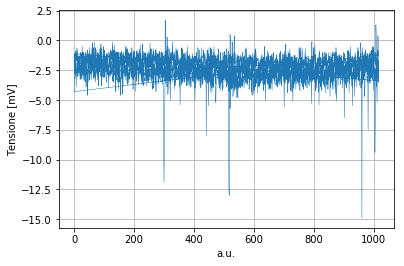

In [15]:
plt.plot(time[7] , wave[7] , linewidth = .5)#stampo il 7mo evento
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

In [16]:
wave.shape

(10000, 4096)

In [17]:
waveCh1 = np.zeros((nEvts,n))
waveCh2 = np.zeros((nEvts,n))
waveCh3 = np.zeros((nEvts,n))
waveCh4 = np.zeros((nEvts,n))

timeCh1 = np.zeros((nEvts,n))
timeCh2 = np.zeros((nEvts,n))
timeCh3 = np.zeros((nEvts,n))
timeCh4 = np.zeros((nEvts,n))


print(waveCh1.shape , nDat/4)

for i in range(nEvts):
    for j in range(nDat):
        if j < nDat/4:
            waveCh1[i][j] = wave[i][j]
            timeCh1[i][j] = time[i][j]
        elif j >= nDat/4 and j < nDat/2:
            waveCh2[i][j-n] = wave[i][j]
            timeCh2[i][j-n] = time[i][j]
        elif j >= nDat/2 and j < nDat*3/4:
            waveCh3[i][j-2*n] = wave[i][j]
            timeCh3[i][j-2*n] = time[i][j]
        elif j >= nDat*3/4: 
            waveCh4[i][j-3*n] = wave[i][j]
            timeCh4[i][j-3*n] = time[i][j]


((10000, 1024), 1024)


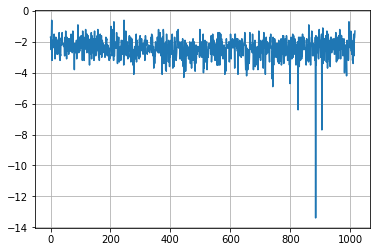

(211, 1, 0.9928385615348816)
(297, 1, 0.9928385615348816)
(512, 1, 0.9928385615348816)
(528, 1, 0.9928385615348816)
(559, 1, 0.9928385615348816)
(641, 1, 0.9928385615348816)
(696, 1, 0.9928385615348816)
(787, 1, 0.9928385615348816)
(884, 1, 0.9928385615348816)
(1419, 1, 0.9928385615348816)
(1477, 1, 0.9928385615348816)
(1532, 1, 0.9928385615348816)
(1573, 1, 0.9928385615348816)
(1758, 1, 0.9928385615348816)
(1761, 1, 0.9928385615348816)
(1977, 1, 0.9928385615348816)
(2055, 1, 0.9928385615348816)
(2357, 1, 0.9928385615348816)
(2530, 1, 0.9928385615348816)
(3377, 1, 0.9928385615348816)
(3776, 1, 0.9928385615348816)
(3939, 1, 0.9928385615348816)
(4231, 1, 0.9928385615348816)
(4380, 1, 0.9928385615348816)
(4621, 1, 0.9928385615348816)
(4693, 1, 0.9928385615348816)
(4698, 1, 0.9928385615348816)
(4751, 1, 0.9928385615348816)
(5103, 1, 0.9928385615348816)
(5547, 1, 0.9928385615348816)
(5598, 1, 0.9928385615348816)
(5661, 1, 0.9928385615348816)
(5783, 1, 0.9928385615348816)
(5816, 1, 0.9928385

In [18]:
plt.plot(timeCh4[156] , waveCh4[156])#alcuni eventi vanno scartati (sono elencati dal programma quali)
plt.grid()
#plt.xlim(0,3)
plt.show()
j= 0
for i in range(nEvts):
    if min(waveCh4[i]) < -110 and waveCh4[i].argmin() < 5: 
        print(i , waveCh4[i].argmin() , timeCh4[i][waveCh4[i].argmin()])
        j = j+1
print(j , 8)
#waveCh4[70][:].argmin()
#print(waveCh4[70][1] , waveCh4[151][1])

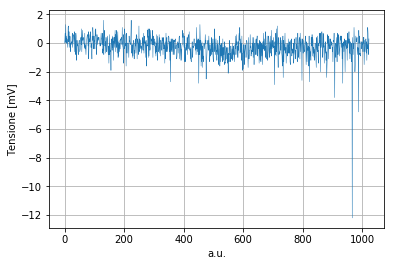

In [19]:
#creo un array per salvare i valori medi di tensione di piedistallo
meanPedestal = np.zeros((nEvts,1))

#scorro i dati e per ciascun evento seleziono una zona pre-segnale di cui faccio la media
#riscrivo quindi i dati scalandoli della media di piedistallo
for i in range(nEvts):
    waveCh4[i] = waveCh4[i]-np.mean(waveCh4[i][100:200])
    
#stampo la forma d'onda riscalata
plt.plot(waveCh4[7] , linewidth = 0.5)
plt.xlabel('a.u.')
plt.ylabel('Tensione [mV]')
plt.grid()
plt.show()

9938


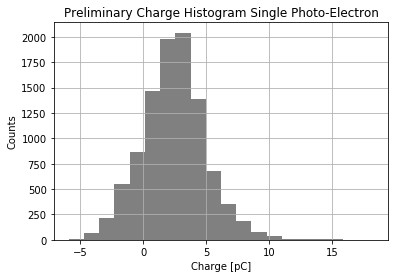

In [30]:

waveCh4A = np.zeros((nEvts-8,n))
R = 50 #resistenza in Ohm

j=0
for i in np.arange(1,nEvts):
    #butto gli eventi con il picco strano
    if min(waveCh4[i]) >= -110 or (min(waveCh4[i])< -110  and waveCh4[i].argmin() != 1):
        #seleziono solo gli eventi che hanno picchi sotto i 50mV (è una prova)
        if min(waveCh4[i]) >= -20: 
            waveCh4A[j] = waveCh4[i]/R #conversione dati Tensione -> dati Corrente
            j = j+1
    else: 1 
        #print(min(waveCh4[i]) , waveCh4[i].argmin() , i) #check
        
        
print(j+1)#check
integral = np.zeros(j)
#Eseguo l'Integrale
for i in range(j):
    integral[i] = sum(-waveCh4A[i])

#Istogramma di Carica    
plt.title('Preliminary Charge Histogram Single Photo-Electron')
plt.ylabel('Counts')
plt.xlabel('Charge [pC]')
plt.hist(integral , bins=20 , color = 'grey')
plt.grid()
#plt.xticks(np.arange(min(integral),max(integral)+1, 5))
plt.savefig('../Grafici/chargeHistSinglePhoto.png')
plt.show()

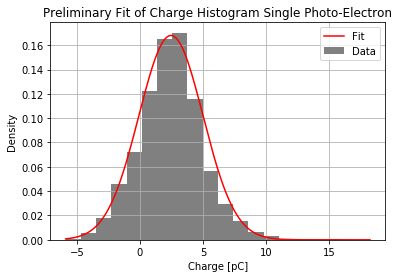

media = 1.81523642415

****************************************
Minimizer is Minuit / Migrad
Chi2                      =  0.000509817
NDf                       =           18
Edm                       =  3.27503e-08
NCalls                    =           52
Constant                  =     0.168625   +/-   0.00364217  
Mean                      =      1.81524   +/-   0.0559148   
Sigma                     =      2.30016   +/-   0.0759963    	 (limited)


In [34]:
import scipy.stats as st #importo la libreria utile al fit


l = np.linspace(min(integral) , max(integral) , len(integral))

m,s = st.norm.fit(integral) #fa il fit con una distribuzione normale di dataset usando come 
                                       #parametri m ed s
pdf = st.norm.pdf(l , m , s) #salva in pdf i valori di pdf corrispondenti a m ,s per i dati contenuti in l


y,x,_ = plt.hist(integral , bins = 20 , density = True , label = 'Data' , color = 'grey')
plt.plot(l , pdf*0.168/max(pdf) , label = 'Fit' , color = 'r') 
plt.grid()

plt.xlabel('Charge [pC]')
plt.ylabel('Density')
plt.title('Preliminary Fit of Charge Histogram Single Photo-Electron')
plt.legend()
#plt.xticks(np.arange(min(integral),max(integral)+1, 5))
plt.savefig('../Grafici/FitSinglePhoto.png')

plt.show()

#print('m = {0} and s = {1}'.format(m , s))
#np.mean(integral)

from ROOT import TMath , TCanvas , TGraph , TH1D
c = TCanvas()
g = TGraph(x.size, x.astype(np.double),y.astype(np.double))

fit = g.Fit("gaus" , "S")

print('media = ' + str(fit.Get().Parameter(1)))

In [22]:
from ROOT import TMath , TCanvas , TGraph , TH1D

h1 = TH1D( 'h1', 'This is the px distribution', 100, -30, 30 )

for i in integral:
    h1.Fill(i)

#scale = 1/h1.Integral()
#h1.Scale(scale)


****************************************
Minimizer is Minuit / Migrad
Chi2                      =  0.000509817
NDf                       =           18
Edm                       =  3.27503e-08
NCalls                    =           52
Constant                  =     0.168625   +/-   0.00364217  
Mean                      =      1.81524   +/-   0.0559148   
Sigma                     =      2.30016   +/-   0.0759963    	 (limited)


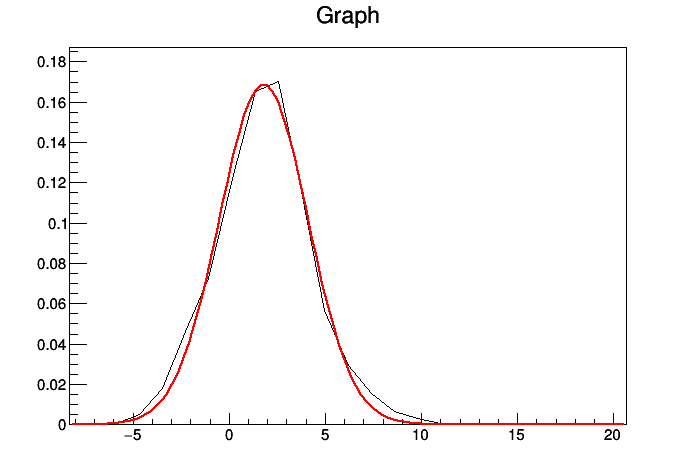

In [29]:
c = TCanvas()
g = TGraph(x.size, x.astype(np.double),y.astype(np.double))

fit = g.Fit("gaus" , "S")

c.Draw()
g.Draw()